In [13]:
%matplotlib inline

import scipy.misc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import matplotlib as mpl
from scipy import stats
import uncertainties as unc

In [14]:
# We start from the pt-hat bin 300to470, because we don't have optimum
# smearing for smaller pt-hat bins.
# jetPt contains the mean AK4 jet pt of the leading jet in each pt-hat bin
jetPt = np.array([367.1,538.5,691.8,901.7,1150.,1563.,2009.,2643.,3472.])
stdDev = np.array([70.47,81.37,101.9,116.9,156.,175.6,215.6,249.3,291.1])
jetRes = np.array([.09,.07,.06,.05,.05,.04,.03,.02,.02])
NEvent = np.full((9,),10000.)

stderr = stdDev/np.sqrt(NEvent) # standard error

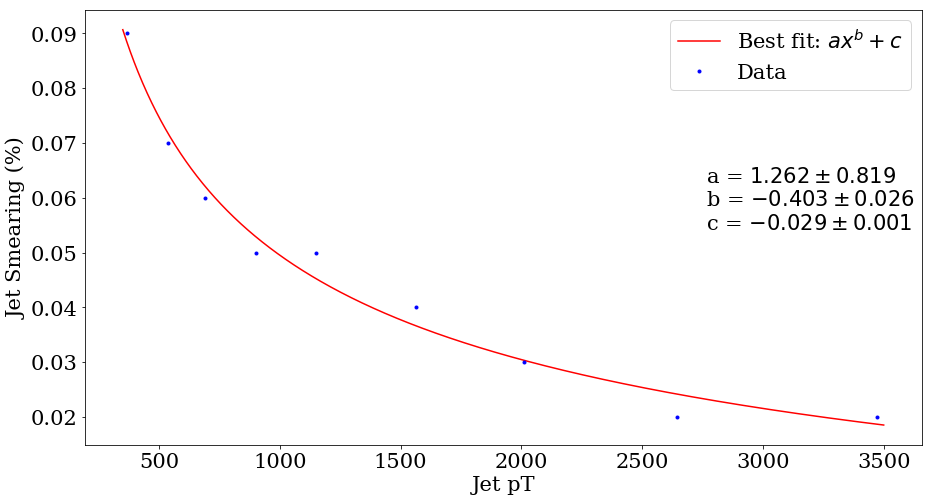

The best fit function is a*x^c + b.
The best results are:
a = 1.262+/-0.819
b = -0.403+/-0.026
c = -0.029+/-0.001


In [99]:
def func(x,a,b,c):
    return a*x**b + c

popt, pcov = curve_fit(func, jetPt, jetRes, p0 = [2,0,-0.3], maxfev=200000)
ran = np.linspace(350,3500,1000)

mpl.rc("font", family="serif", size=21)
plt.figure(figsize=(15,8))
plt.plot(ran, func(ran, *popt), 'r')
plt.plot(jetPt,jetRes,'b.')
plt.ylabel("Jet Smearing (%)")
plt.xlabel("Jet pT")
plt.legend(['Best fit: $ax^b+c$', 'Data'])
plt.figtext(.7, .5, 'a = $%4.3f\pm%4.3f$' % (popt[0],pcov[0][0])
                    +'\nb = $%4.3f\pm%4.3f$' % (popt[1],pcov[1][1])
                    +'\nc = $%4.3f\pm%4.3f$' % (popt[2],pcov[2][2]))
plt.show()

print('The best fit function is a*x^c + b.')
print('The best results are:\na = %4.3f+/-%4.3f' % (popt[0],pcov[0][0])
                         + '\nb = %4.3f+/-%4.3f' % (popt[1],pcov[1][1])
                         + '\nc = %4.3f+/-%4.3f' % (popt[2],pcov[2][2]))